# Variables aleatorias (abolutamente) continuas

**Definición.** Una variable aleatoria absolutamente continua es aquella para la cual existe una función $f_X$ no negativa, llamada función de densidad, tal que:
$$
F_X(x) = \mathbb{P}(X\leq x) = \int_{-\infty}^{x} f_X(y) dy, \quad x\in \mathbb{R}
$$

**Lema.** Sea $F_X$ una función de distribución. Supongamos que $F_X$ es derivable y que su derivada es continua en $(a, b)$, donde:
$ a = \inf \{ x \in \mathbb{R} \mid F_X(x) > 0 \}, \quad b = \sup \{ x \in \mathbb{R} \mid F_X(x) < 1 \}$
entonces, la función de densidad se puede obtener como:
$$ f_X(x) =
\begin{cases} 
F'_X(x), & \text{si } x \in (a, b), \\
0, & \text{e.o.c.}
\end{cases}$$

Es decir,
$$ \frac{dF_X(x)}{dx} = f_X(x)$$


In [1]:
import numpy as np # Importamos Numpy
import numpy.random as npr # para generar numeros aleatorios

import scipy.stats as sps # Importamos el modulo SciPy
from scipy.stats import randint # para trabajar una uniforme discreta en un rango de enteros

import matplotlib.pyplot as plt #Visualizar datos 

import random # para generar numeros aleatorios

## Variable aleatoria uniforme sobre el intervalo $(a,b)$.

Una variable aleatoria $X$ se dice que tiene distribución uniforme continua  en el intervalo $(a,b)$ con $a,b\in\mathbb{R}$, si su función de densidad esta dada por:
$$f_{X}(x)=\begin{cases}
	\frac{1}{b-a} &\quad \text{si } a< x < b\\
	\qquad 0 &\quad \text{en otro caso}  
\end{cases}$$

**Notación.** $X\sim \text{Unif}(a,b)$ $\text{Unif}[a,b]$

**Obs:**
* La distribución uniforme continua en $(a,b)$ es simétrica.
* A los intervalos de la misma longitud contenidos en $(a,b)$ se les asigna la misma probabilidad. Esto se representa gráficamente con la probabilidad de que $X$ se encuentre en el intervalo $(s,t)$:


La función de distribución de $X\sim Unif((a,b))$ esta dada por:
$$F_{X}(x)=\begin{cases}
	 0 &\quad \text{si } x\le a \\
	\frac{x-a}{b-a} &\quad \text{si } a<x<b\\
	 1 &\quad \text{si } x\ge b  
\end{cases}$$

La esperanza de una variable aleatoria uniforme es la siguiente,
$$\begin{align*}
\mathbb{E}[X] &= \int_{a}^{b}xf_{X}(x)dx = \int_{a}^{b}x\frac{1}{b-a}dx = \frac{1}{b-a}\int_{a}^{b}xdx  = \frac{1}{b-a}\left[\frac{x^{2}}{2}\right]_{a}^{b} \\ &= \frac{1}{b-a}\left[\frac{b^{2}}{2}-\frac{a^{2}}{2}\right] =  \frac{b^{2}-a^{2}}{2(b-a)} = \frac{(b-a)(b+a)}{2(b-a)} = \frac{a+b}{2}.
\end{align*}$$

Para calcular la varianza, primero vamos a calcular el segundo momento
$$\begin{align*}
\mathbb{E}[X^{2}] &= \int_{a}^{b}x^{2}f_{X}(x)dx = \int_{a}^{b}x^{2}\frac{1}{b-a}dx = \frac{1}{b-a}\int_{a}^{b}x^{2}dx \\ &= \frac{1}{b-a}\left[\frac{x^{3}}{3}\right]_{a}^{b} = \frac{1}{b-a}\left[\frac{b^{3}}{3}-\frac{a^{3}}{3}\right] =  \frac{b^{3}-a^{3}}{3(b-a)}.
\end{align*}$$

Por lo que se tiene lo siguiente

$$Var(X) = \mathbb{E}[X^{2}]-(\mathbb{E}[X])^{2} =\frac{b^{3}-a^{3}}{3(b-a)}-\left(\frac{a+b}{2}\right)^{2} = \frac{(b-a)^{2}}{12}.$$

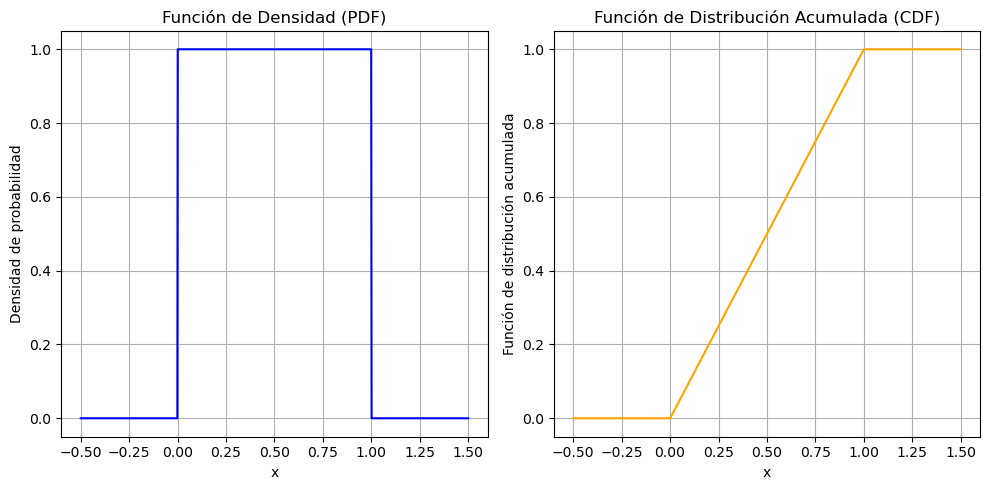

In [2]:
# Parámetros de la distribución uniforme
a = 0  # límite inferior
b = 1  # límite superior

# Definimos las funciones de densidad y distribución
# Función de densidad (pdf) de la distribución uniforme
def uniform_pdf(x, a, b):
    return np.where((x >= a) & (x <= b), 1 / (b - a), 0)

# Función de distribución (cdf) de la distribución uniforme
def uniform_cdf(x, a, b):
    return np.where(x < a, 0, np.where(x > b, 1, (x - a) / (b - a)))
    
# Generar valores de x
x = np.linspace(-0.5, 1.5, 1000)

# Calcular la función densidad 
pdf_values = uniform_pdf(x, a, b)

# Calcular la función de distribución
cdf_values = uniform_cdf(x, a, b)

# Graficar la PDF
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x, pdf_values, label='PDF', color='blue')
plt.xlabel('x')
plt.ylabel('Densidad de probabilidad')
plt.title('Función de Densidad (PDF)')
plt.grid(True)

# Graficar la CDF
plt.subplot(1, 2, 2)
plt.plot(x, cdf_values, label='CDF', color='orange')
plt.xlabel('x')
plt.ylabel('Función de distribución acumulada')
plt.title('Función de Distribución Acumulada (CDF)')
plt.grid(True)

plt.tight_layout()
plt.show()

**Ejemplo.** 	Sea $X\sim Unif((-3,2))$. Vamos a calcular: $P(X\ge 0)$ y
$P(-5 \le X \le 1/2)$.

**Solución.** La función de densidad de esta variable aleatoria esta dada por:
$$f_{X}(x)=\begin{cases}
	\quad \frac{1}{5} &\quad \text{si } -3\le x \le 2\\
	\quad 0 &\quad \text{e.o.c}  
\end{cases}$$
Entonces,

$$\begin{align}
\mathbb{P}(X\ge 0) &= \int_{0}^{2}\frac{1}{5}dx=\frac{1}{5}x\Big|_{0}^{2}=\frac{2}{5} \\
\mathbb{P}(-5 \le X \le 1/2) &= \int_{-5}^{-3}f_{X}(x)dx+\int_{-3}^{1/2}\frac{1}{5}dx=\frac{1}{5}x\Big|_{-3}^{1/2}=\frac{1}{5}\left(\frac{1}{2}+3\right)=\frac{7}{10}
\end{align}$$

Utilizando la $F_X$, se tiene:

- $\mathbb{P}(X\ge 0)=1-F_X(0)$ 
- $\mathbb{P}(-5 \le X \le 1/2) = F_X(1/2)-F_X(-5)$

In [3]:
from scipy.stats import uniform

# Parámetros de la distribución uniforme
a = -3  # límite inferior
b = 2   # límite superior

# Crear el objeto de distribución uniforme usando scipy
uniform_dist = uniform(loc=a, scale=b-a)

# Calcular P(X >= 0) = 1 - P(X < 0)
p_0 = 1 - uniform_dist.cdf(0)

# Calcular P(-5 <= X <= 1/2)
p_interval = uniform_dist.cdf(1/2) - uniform_dist.cdf(-5)

# Imprimir los resultados
print(f"P(X >= 0) = {p_0}")
print(f"P(-5 <= X <= 1/2) = {p_interval}")

P(X >= 0) = 0.4
P(-5 <= X <= 1/2) = 0.7


$\color{red}{\text{Ejercicio 1.}}$ Un alumno se dirige a la biblioteca para solicitar el préstamo de un libro y decide que no puede esperar más de $10$ minutos en ser atendido. Supongamos que el bibliotecario tarda por lo menos $0.5$ minutos en atender a una persona, entonces es razonable proponer una distribución uniforme en el intervalo $[0.5,10]$ para modelar el comportamiento de la variable $X$ que es el tiempo en ser atendido (en  minutos).

- Da la función de densidad y gráfica.
- ¿Cuál es la probabilidad de que el tiempo en ser atendido sea mayor a $5$ minutos pero menor a $8$ minutos?
- ¿Cuál es la esperanza y varianza?
- Calcula la función de distribución y gráficala, y con ella calcula: $\mathbb{P}(2.51\le X \le 7.99)$.

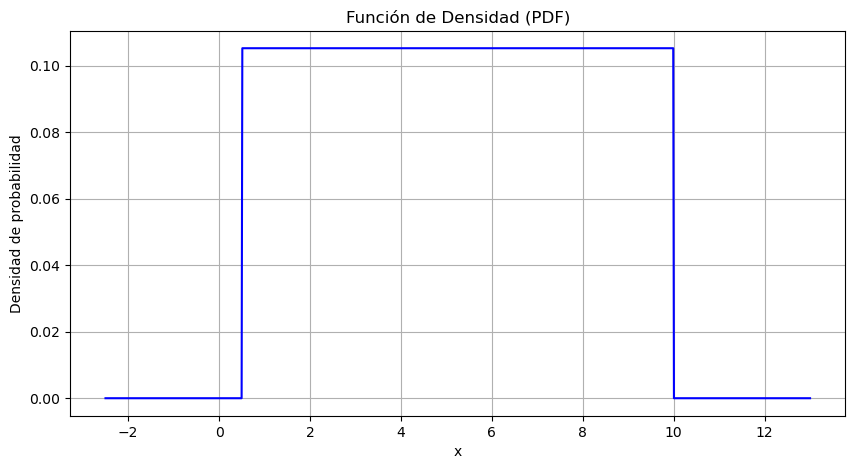

In [7]:
# Definimos los valores de a y b
a = 0.5
b = 10

# Definimos la función de densidad 

def uniform_pdf(x, a, b):
    return np.where((x >= a) & (x <= b), 1 / (b - a), 0)

# Graficamos la función de densidad 

# Generar valores de x
x = np.linspace(a-3, b+3, 1000)

# Calcular la función densidad 
pdf_values = uniform_pdf(x, a, b)

# Graficar la PDF
plt.figure(figsize=(10, 5))
plt.plot(x, pdf_values, label='PDF', color='blue')
plt.xlabel('x')
plt.ylabel('Densidad de probabilidad')
plt.title('Función de Densidad (PDF)')
plt.grid(True)

Para calcular $\mathbb{P}(5\le X \le 8)$ se tiene que:

$$f_{X}(x)=\begin{cases}
	\quad \frac{1}{9.5} &\quad \text{si } 0.5\le x \le 10\\
	\quad 0 &\quad \text{e.o.c}  
\end{cases}$$
entonces 
$$\mathbb{P}(5\le X \le 8)= \int_{5}^{8}\frac{1}{9.5}dx=\frac{1}{9.5}x\Big|_{5}^{8} = \frac{3}{9.5}$$

In [8]:
# Para la esperanza se tiene 

esperanza = (a+b)/2

# Para la varianza se tiene 

varianza = (b-a)**2/12

print('La esperanza es:',esperanza)
print('La varianza es:',varianza)

La esperanza es: 5.25
La varianza es: 7.520833333333333


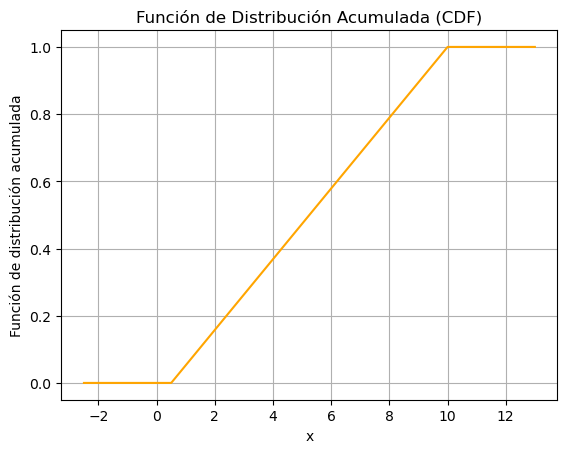

In [9]:
# Definimos la función de distribución 
# Función de distribución (cdf) de la distribución uniforme
def uniform_cdf(x, a, b):
    return np.where(x < a, 0, np.where(x > b, 1, (x - a) / (b - a)))

# Graficamos la función de distribución 
# Generar valores de x
x = np.linspace(a-3, b+3, 1000)

# Calcular la función de distribución
cdf_values = uniform_cdf(x, a, b)

plt.plot(x, cdf_values, label='CDF', color='orange')
plt.xlabel('x')
plt.ylabel('Función de distribución acumulada')
plt.title('Función de Distribución Acumulada (CDF)')
plt.grid(True)

In [12]:
# Calculamos P(2.51 <= X <= 7.99)
prob = uniform_cdf(7.99, a, b) - uniform_cdf(2.51, a, b)

print('P(2.51 <= X <= 7.99) =',prob)

P(2.51 <= X <= 7.99) = 0.576842105263158


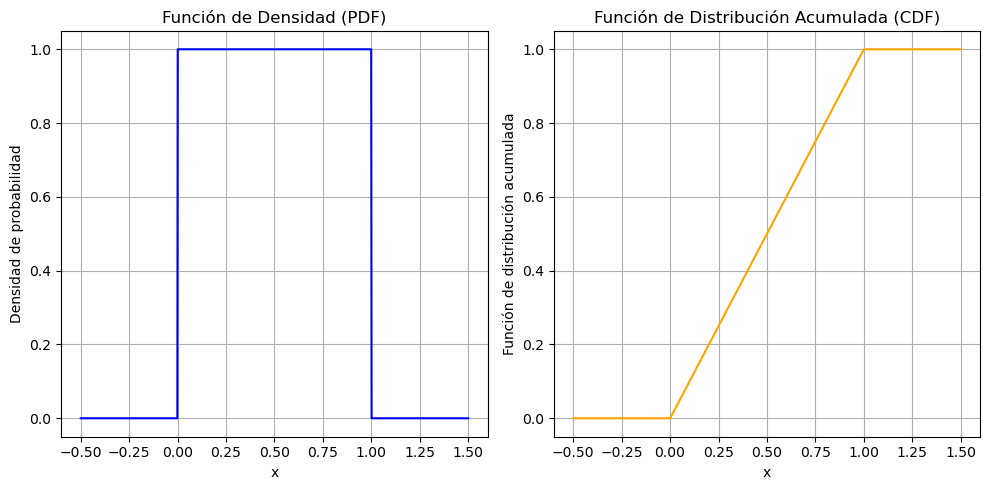

In [4]:
from scipy.stats import uniform

# Parámetros de la distribución uniforme
a = 0  # límite inferior
b = 1  # límite superior

# Crear el objeto de distribución uniforme usando scipy
uniform_dist = uniform(loc=a, scale=b-a)

# Generar valores de x
x = np.linspace(-0.5, 1.5, 1000)

# Calcular la PDF usando scipy
pdf_values = uniform_dist.pdf(x)

# Calcular la CDF usando scipy
cdf_values = uniform_dist.cdf(x)

# Graficar la PDF
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(x, pdf_values, label='PDF', color='blue')
plt.xlabel('x')
plt.ylabel('Densidad de probabilidad')
plt.title('Función de Densidad (PDF)')
plt.grid(True)

# Graficar la CDF
plt.subplot(1, 2, 2)
plt.plot(x, cdf_values, label='CDF', color='orange')
plt.xlabel('x')
plt.ylabel('Función de distribución acumulada')
plt.title('Función de Distribución Acumulada (CDF)')
plt.grid(True)

plt.tight_layout()
plt.show()

$$\mathbb{P}(X\ge 0) = 1-\mathbb{P}(X<0) = 1-F_X (0)$$

$$F_X(x):=\mathbb{P}(X\le x)$$


$$\mathbb{P}(-5 \le X \le 1/2) = F_X (1/2)-F_X(-5)$$


P(X >= 0) = 0.4
P(-5 <= X <= 1/2) = 0.7


## Variable aleatoria exponencial con parámetro $\lambda >0$.

La distribución exponencial es una de las distribuciones continuas más utilizadas. A menudo se utiliza para modelar el tiempo transcurrido entre eventos.  

Algunos ejemplos en los que podría utilizarse la distribución exponencial son:
* El tiempo transcurrido en un call center hasta recibir la primer llamada del día.
* El  tiempo entre terremotos de una determinada magnitud.
* Supongamos una máquina que produce hilo de alambre, la cantidad de metros de alambre hasta encontrar una falla en el alambre se podría modelar como una exponencial.

Se dice que la variable aleatoria $X$ tiene distribución exponecial de parámetro $\lambda>0$, si su función de densidad está dada por:
$$f_{X}(x)=\begin{cases}
\lambda e^{-\lambda x} & x>0\\
0 & \text{en otro caso}
\end{cases}$$


Notación. $X\sim \exp(\lambda).$

$\textbf{Propiedad de pérdida de memoria:}$
$$\mathbb{P}(X>t+s \mid X>t)=\mathbb{P}(X>s)=e^{-\lambda s}.$$

Ejercicio: Demostrar la propiedad de pérdida de memoria para $X\sim \exp(\lambda)$.

Ejemplo: hipótesis natural para modelar las duraciones de vida de átomos radioactivas (Rutherford y Soddy). Cada átomo radioactivo posee una duración de vida que sigue una ley exponencial. En este campo, el parámetro $\lambda$ se llama la constante de desintegración.

 Si $t\mapsto \rho(t)=\mathbb{P}(X>t)$ verifica
$$\rho(t+s)=\rho(t)\rho(s),$$
de manera que (derivando en $s$, con $s=0$),
$$\rho^{\prime}(t)=-\rho(t)\lambda \qquad \ \lambda=-\rho^{\prime}(0)\geq 0.$$
Así,
$$\rho(t)=e^{-\lambda t} \qquad \text{y} \qquad f(t)=\lambda e^{-\lambda t} \ \  \rho(0)=1.$$



La esperanza y varianza de de una distribución exponencial de la forma $$f_{X}(x)=\begin{cases}
\frac{1}{\lambda} e^{-\frac{x}{\lambda}} & x>0\\
0 & \text{en otro caso}
\end{cases}$$:
$$\mathbb{E}[X]= \int_{0}^{\infty}xf_{x}(x)dx = \int_{0}^{\infty}x\frac{1}{\lambda}e^{-\frac{x}{\lambda}}dx = \lambda$$
y
$$\begin{align*}
\text{Var}(X) &= \mathbb{E}[X^{2}]-(\mathbb{E}[X])^{2} = \int_{0}^{\infty}x^{2}f_{x}(x)dx-\lambda^{2} \\ &= \int_{0}^{\infty}x^{2}\frac{1}{\lambda}e^{-\frac{x}{\lambda}}dx - \lambda^{2} = \lambda^{2}
\end{align*}$$

Se tiene que la función de distribución de la v.a. exponencial:
$$ F_X(x) = \mathbb{P}(X\le x)=\int_{0}^{x}\frac{1}{\lambda} e^{-\frac{x}{\lambda}} = 1-e^{-\frac{x}{\lambda}}$$

**Ejemplo**

Consideremos la variable aleatoria $X$ como el tiempo (en minutos) entre la llegada de dos personas a la fila  de una sucuarsal bancaria.

Adicionalmente, el banco ha determinado que solo el $10\%$ de las veces, el tiempo que transcurre entre la llegada de una persona y otra es mayor a dos minutos.

Esto permite calcular el valor de $\lambda$, ya que
$$\mathbb{P}(X>2)=0.1$$
entonces
$$1-\mathbb{P}(X\le 2) = 1-F_{X}(2) = 0.1$$

Notemos que si $X\sim Exp\left( \lambda \right)$, entonces $F_{X})(x) = 1-e^{-\frac{x}{\lambda}}$

Por lo que $F_{X}(2)= 1-e^{\frac{-2}{\lambda}} =0.9$, entonces
$e^{\frac{-2}{\lambda}}=0.1$. Por lo que
$$\frac{-2}{\lambda}=\ln(0.1) \Rightarrow \lambda=0.87$$
Por lo tanto $X\sim\exp(0.87)$.

Ahora queremos calcular la probabilidad de que entre la llegada de una persona y otra transcurra por lo menos un minuto, lo cual puede calcularse de dos formas:


$$\begin{align*}
\mathbb{P}(X>1) &= \int_{1}^{\infty}f_{X}(x)dx = \int_{1}^{\infty}\frac{1}{0.87}e^{\frac{-x}{0.87}}dx = 0.32
\end{align*}$$
$$\begin{align*}
\mathbb{P}(X>1) &= 1-\mathbb{P}(X\le 1) = 1-\left[1-e^{\frac{-1}{0.87}}\right] = e^{\frac{-1}{0.87}}
\end{align*}$$



$\color{red}{\text{Ejercicio 2.}}$ Calcular las probabilidades con Scipy

Una propiedad interesante de la distribución exponencial es que puede verse como un análogo continuo de la distribución geométrica. Para ver esto, recuerde el experimento aleatorio detrás de la distribución geométrica: lanza una moneda (repite un experimento de Bernoulli) hasta que observa las primeras caras (éxito).


$\mathbf{Teorema.-}$ Sea $\varepsilon>0$ y $Y_{\epsilon}\sim Geo(p_{\varepsilon})$. Supongamos que nos encontramos en el regimen:
$$\lim_{\varepsilon\to 0}p_{\varepsilon}=0 \qquad \text{y} \qquad \varepsilon^{-1}p_{\varepsilon}\sim \lambda>0$$
   Sea $X_{\varepsilon}:=\varepsilon Y_{\varepsilon}$. Entonces,
   $$\lim_{\varepsilon\to 0}F_{X_{\varepsilon}}(x)=F_{X}(x),$$
   en donde $X\sim \exp(\lambda)$. Este también es un resultado de convergencia en ley.

Visualicemos lo anterior:

También, tenemos el siguiente resultado:

$\mathbf{Teorema.-}$ Sea $X\sim \exp(1)$. Si $Y=\min\{k\in \mathbb{Z}: k\geq \lambda X \}$, con $\lambda>0$, entonces
$$Y\sim Geo\left(p=1-e^{-1/\lambda} \right).$$

# Variable aleatoria normal con parámetros media $\mu$ y varianza $\sigma^{2}$.

La distribución normal es una de las más importantes y de mayor uso tanto en la teoría de la probabilidad, como en la teoría estadística.

También llamada distribución gaussiana, en honor a Gauss, a quien se considera el padre de ésta distribución.

La importancia de la distribución normal, radica en el famoso Teorema central del límite. Fue descubierta por De Moivre en 1733 como un límite de la distribución binomial.


La importancia de esta distribución radica en que permite modelar numerosos fenómenos naturales, sociales y psicológicos, por ejemplo:
* Estatura
* Efectos de un fármaco
* Consumo de cierto producto por un grupo de individuos
* Coeficiente intelectual
* Nivel de ruido en telecomunicaciones
* Errores cometidos al medir ciertas magnitudes

Además, esta distribución juega un papel de suma importancia en la inferencia estadística.

Se dice que la variable aleatoria $X$ tiene distribución normal de parámetros $\mu$ y $\sigma^{2}$, donde $\mu,\sigma\in\mathbb{R}$ y $\sigma>0$, si su función de densidad está dada por:
$$f_{X}(x)=\begin{cases}
	\frac{1}{\sqrt{2\pi\sigma^{2}}}e^{-\frac{(x-\mu)^{2}}{2\sigma^{2}}} &\quad \text{si }  x \in\mathbb{R} \\
	\qquad 0 &\quad \text{e.o.c}  
\end{cases}$$

**Notación.** $X\sim N(\mu,\sigma^{2})$


Tal curva (**la campana de Gauss-Bell**) es una función que depende de los parámetros $\mu$ y $\sigma^{2}$.


**Observación:** El parámetro $\mu$ se llama *media* y el  parámetro $\sigma^{2}$ se llama *varianza*.

La función de densidad definida anteriormente es efecto función de densidad, ya que
$$\int_{\mathbb{R}}f_{X}(x)dx = \int_{\mathbb{R}}\frac{1}{\sqrt{2\pi\sigma^{2}}}e^{-\frac{(x-m)^{2}}{2\sigma^{2}}}  = 1 $$

Variable aleatoria normal con parámetros  0  y  1 .
La ley de $Z\sim N(0,1)$ está dada por la función de densidad
$$
f_{Z}(z) = \frac{1}{\sqrt{2\pi}}e^{-\frac{z^2}{2}},
$$
para $z\in \mathbb{R}$.

Sabemos que:
* La varianza es usada como una medida para comparar la dispersión en dos o más conjuntos de observaciones.
* Una desviación estándar pequeña indica que los valores de la variable aleatoria se encuentran cercanos a la media.
* Una desviación estándar grande indica que los valores de la variable aleatoria se dispersan mucho con respecto a la media.

La función de distribución de una variable aleatoria $X\sim N(\mu,\sigma^{2})$ está dada por:
$$F_{X}(x) = \int_{-\infty}^{x}\frac{1}{\sqrt{2\pi\sigma^{2}}}e^{-\frac{(y-\mu)^{2}}{2\sigma^{2}}}dy$$

Esta nos proporciona la probabilidad de que $X$ tome calores menores o iguales a un valor específico $x$, y corresponde al área bajo la curva en el intervalo $(-\infty,x]$:

No es sencillo calcular $F_{X}(x)$, pero cualquier v.a. gaussiana puede transformarse a una v.a. estandarizada. Existen tablas para esta v.a., lo cual hace los cálculos más fáciles.

**Proposición**  Sea $X\sim N(\mu,\sigma^{2})$, entonces
$$Z=\frac{X-\mu}{\sigma}$$
tiene una distribución gaussiana con media $0$ y varianza $1$, es decir, $Z\sim N(0,1)$.


**Demostración** 	Primero vamos a calcular la función de distribución de $Z$:
$$F_{Z}(z):=\mathbb{P}(Z\le z) = \mathbb{P}\left(\frac{X-\mu}{\sigma}\le z\right) = \mathbb{P}(X\le \sigma z + \mu) := F_{X}(\sigma z + \mu)$$
Entonces, la función de densidad de $Z$ esta dada por:
$$f_{Z}(z) = \frac{dF_{Z}(z)}{dz} = \frac{dF_{X}(\sigma z + \mu)}{dz} = \sigma f_{X}(\mu+\sigma z) = \frac{e^{-z^{2}/2}}{\sqrt{2\pi}}$$

Decimos que $X$ tiene distribución gaussiana estándar (normal estándar), $X\sim N(0,1)$, si su función de densidad esta dada por:
$$f_{X}(x)=\begin{cases}
	\frac{e^{-x^{2}/2}}{\sqrt{2\pi}} &\quad \text{si }  x \in\mathbb{R} \\
	\quad 0 &\quad \text{e.o.c}  
\end{cases}$$

Podemos calcular cualquier probabilidad de la forma
$$\mathbb{P}(a<X<b)$$
de la siguiente manera: para $z\ge 0$, definimos
$$\Phi(z) = \frac{1}{\sqrt{2\pi}}\int_{0}^{z}e^{-x^{2}/2}dx.$$


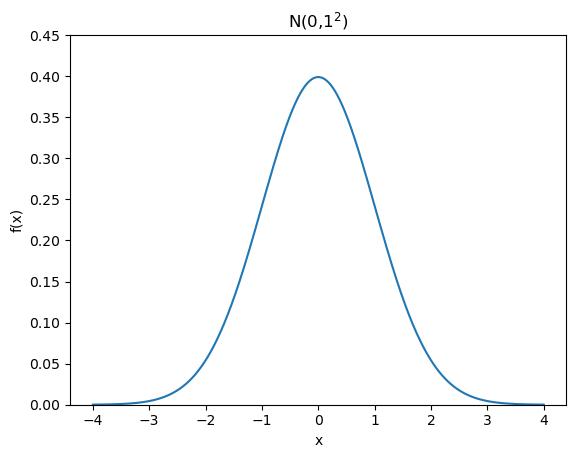

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
fig, ax = plt.subplots()
x= np.arange(-4,4,0.001) #generar valores de x
ax.set_title('N(0,$1^2$)')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.plot(x, norm.pdf(x))
ax.set_ylim(0,0.45)
plt.show()

Propiedades de la función de densidad de probabilidades de una distribución normal estándar:

1. Es positiva: $f(x)\geq 0$ para todo $x$ real.
2. Es continua y derivable en todas partes.
3. Es simétrica alrededor de $\mu$.
4. Conforme $x$ toma valores muy grandes de manera positiva y negativa, la función decrece hacia cero muy rápidamente.
5. Tiene un máximo global.
6. El área total bajo la curva es igual a $1$.

Veamos el comportamiento de la función conforme se cambia la varianza.

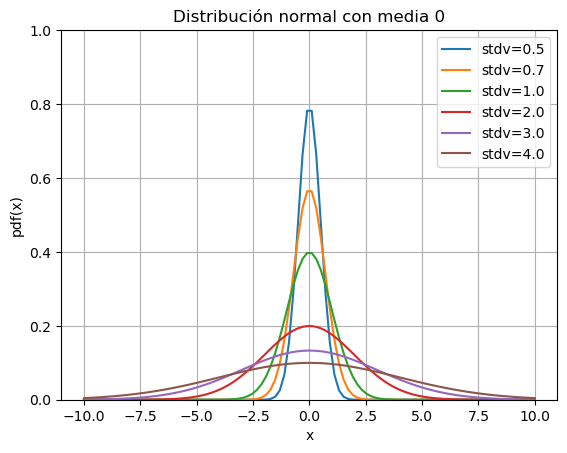

In [15]:
from scipy.stats import norm
fig, ax = plt.subplots()
x = np.linspace(-10,10,100)
stdvs = [0.5, 0.7, 1.0, 2.0, 3.0, 4.0]
for s in stdvs:
    ax.plot(x, norm.pdf(x,scale=s), label='stdv=%.1f' % s)

ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title('Distribución normal con media 0')
ax.legend(loc='best', frameon=True)
ax.set_ylim(0,1)
ax.grid(True)

Veamos el comportamiento de la función conforme se cambia la media.

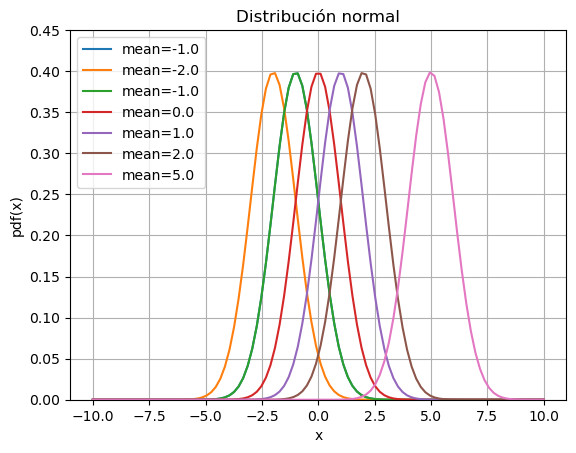

In [16]:
from scipy.stats import norm
fig, ax = plt.subplots()
x = np.linspace(-10,10,100)
means = [-1.0,-2.0, -1.0, 0.0, 1.0, 2.0, 5.0]
for mean in means:
    ax.plot(x, norm.pdf(x,loc=mean), label='mean=%.1f' % mean)

ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title('Distribución normal')
ax.legend(loc='best', frameon=True)
ax.set_ylim(0,0.45)
ax.grid(True)

### Función de distribución acumulativa de una normal $N(\mu,\sigma^2)$.

Gracias a las propiedades anteriores, es posible calcular áreas delimitadas de la función $f$. Si $a$ y $b$ son reales cualesquiera, denotaremos por
$$P(a\leq X\leq b),$$
la probabilidad de que $X$ esté en el intervalo $[a,b]$, al área bajo la curva de $f(x)$ sobre el intervalo $[a,b]$.

También, $P(X\leq x)$ denotara al área bajo la curva de la función $f(x)$ sobre el intervalo $(-\infty,x)$ y $P(X>x)$ denotara al área bajo la curva de la función $f(x)$ sobre el intervalo $(x, \infty)$.

A la probabilidad $\text{cdf}(x):=P(X\leq x)$ se llama la distribución acumulativa (hasta el valor $x$) de $f(x)$.

Con la notación anterior,
$$P(a\leq X\leq b)=\text{cdf}(b)-\text{cdf}(a)$$
y
$$\text{sf}(a):=P(X>a)=1-\text{cdf}(a).$$

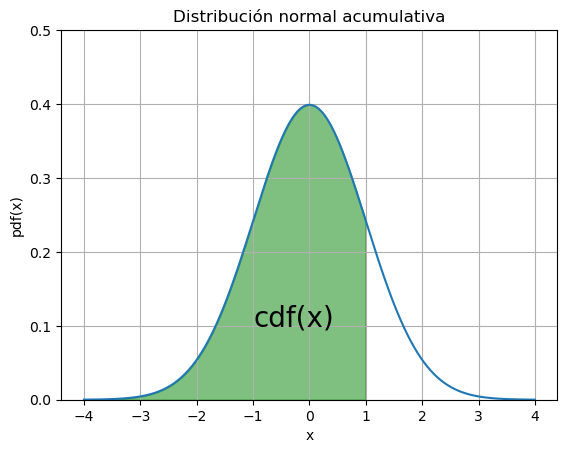

In [17]:
from scipy.stats import norm
fig, ax = plt.subplots()
# for distribution curve
x= np.arange(-4,4,0.001)
ax.plot(x, norm.pdf(x))
ax.set_title("Distribución normal acumulativa")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
# for fill_between
px=np.arange(-4,1,0.01)
ax.set_ylim(0,0.5)
ax.fill_between(px,norm.pdf(px),alpha=0.5, color='g')
# for text
ax.text(-1,0.1,"cdf(x)", fontsize=20)
plt.show()

### Cálculo de probabilidades de una distribución normal



Calculemos $\text{cdf}(2)=\mathbb{P}(X<2)$ cuando $X\sim N(3,2^2)$.

$$Z = \frac{X-\mu}{\sqrt{\sigma^2}} \sim N(0,1)$$

In [18]:
norm.cdf(x=2, loc=3, scale=2) #v.a. con media=3 y st=2

np.float64(0.3085375387259869)

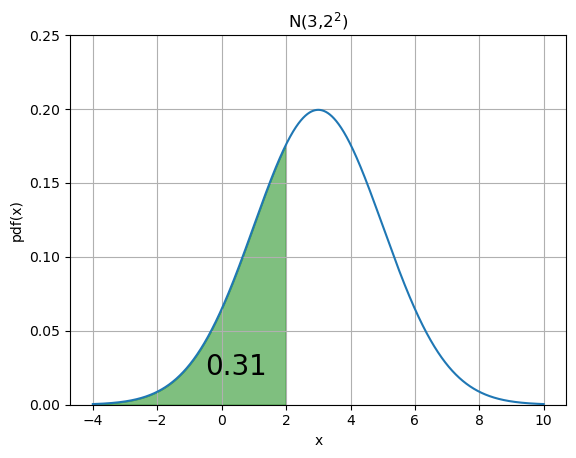

In [19]:
from scipy.stats import norm
fig, ax = plt.subplots()
# for distribution curve
x= np.arange(-4,10,0.001)
ax.plot(x, norm.pdf(x,loc=3,scale=2))
ax.set_title("N(3,$2^2$)")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
# for fill_between
px=np.arange(-4,2,0.01)
ax.set_ylim(0,0.25)
ax.fill_between(px,norm.pdf(px,loc=3,scale=2),alpha=0.5, color='g')
# for text
ax.text(-0.5,0.02,round(norm.cdf(x=2, loc=3, scale=2),2), fontsize=20)
plt.show()

Calculemos $\mathbb{P}(0.5<𝑋<2)$ cuando $X\sim N(1,2)$.

In [15]:
s=np.sqrt(2)
norm(1, s).cdf(2) - norm(1,s).cdf(0.5)

0.3984131339906417

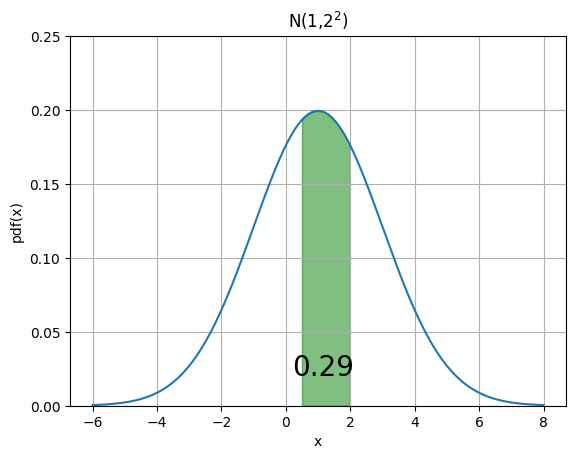

In [16]:
fig, ax = plt.subplots()
x= np.arange(-6,8,0.001)
ax.plot(x, norm.pdf(x,loc=1,scale=2))
ax.set_title("N(1,$2^2$)")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
px=np.arange(0.5,2,0.01)
ax.set_ylim(0,0.25)
ax.fill_between(px,norm.pdf(px,loc=1,scale=2),alpha=0.5, color='g')
pro=norm(1, 2).cdf(2) - norm(1,2).cdf(0.5)
ax.text(0.2,0.02,round(pro,2), fontsize=20)
plt.show()

**Ejemplo importante** Si $Z\sim N(0,1)$, encuentra $\mathbb{P}(-1.93 < Z < 1.93)$. La probabilidad buscada es:


In [17]:
norm(0,1).cdf(1.93)-norm(0,1).cdf(-1.93)

0.9463931622458901

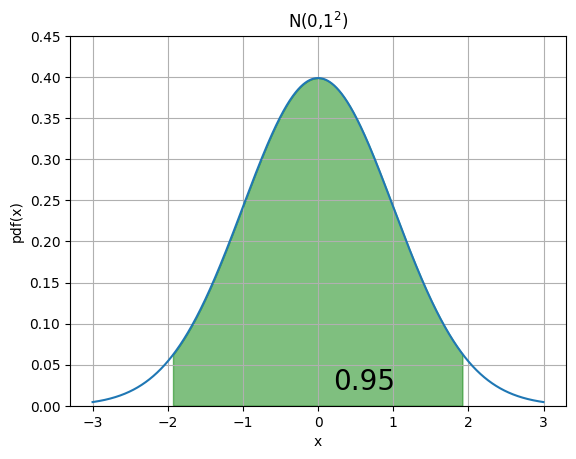

In [18]:
fig, ax = plt.subplots()
# for distribution curve
x= np.arange(-3,3,0.001)
ax.plot(x, norm.pdf(x,loc=0,scale=1))
ax.set_title("N(0,$1^2$)")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
px=np.arange(-1.93,1.93,0.01)
ax.set_ylim(0,0.45)
ax.fill_between(px,norm.pdf(px,loc=0,scale=1),alpha=0.5, color='g')
pro=norm(0, 1).cdf(1.93) - norm(0,1).cdf(-1.93)
ax.text(0.2,0.02,round(pro,2), fontsize=20)
plt.show()

### Cálculo de probabilidades:
$\mathbb{P}(0<Z<b)$: Queremos calcular $\mathbb{P}(0<Z<0.43)$, lo cuál puede realizarse de la siguiente manera:
* Tablas de área a la derecha: $\mathbb{P}(0<Z<0.43) = 0.1664$

$\mathbb{P}(-b<Z<b)$: Queremos calcular $\mathbb{P}(-0.16<Z<0.16)$, lo cuál puede realizarse de la siguiente manera:
* Tablas de área a la derecha:  $\mathbb{P}(-0.16<Z<0.16) = \mathbb{P}(-0.16<Z<0)+\mathbb{P} (0<Z<0.16) = \mathbb{P}(0<Z<0.16)+\mathbb{P}(0<Z<0.16) = 2\mathbb{P}(0<Z<0.16) = 2(0.0636) = 0.1272$

$\mathbb{P}(Z<-b)$: Queremos calcular $\mathbb{P}(Z<-1.94)$, lo cuál puede realizarse de la siguiente manera:
* Tablas de área a la derecha: $\mathbb{P}(Z<-1.94) = \mathbb{P}(Z<0)+\mathbb{P}(-1.94<Z<0) = \mathbb{P}(Z<0) + \mathbb{P}(0<Z<1.94) = 0.5 - 0.4738 = 0.0262$

$\mathbb{P}(Z>-b)$: Queremos calcular $(Z>-0.07)$, lo cuál puede realizarse de la siguiente manera:
* Tablas de área a la derecha: $\mathbb{P}(Z>-0.07) = \mathbb{P}(-0.07<Z<0) + \mathbb{P}(Z>0) = \mathbb{P}(0<Z<0.07) + \mathbb{P}(Z>0) = 0.0279 + 0.5 = 0.5279$

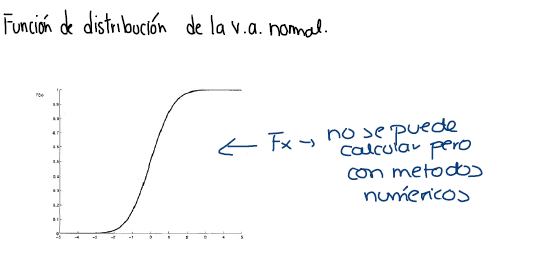

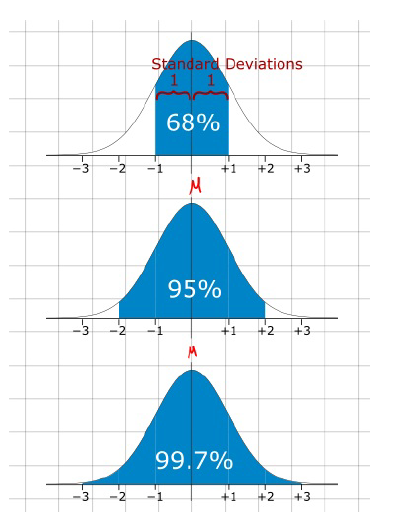

## Variable aleatoria Gamma con parámetros $\alpha$ y $\lambda$.

 La distribución gamma se obtiene al considerar el tiempo que transcurre entre cierto número de ocurrencias de eventos que ocurren aleatoriamente en el tiempo

La función gamma $\Gamma:(0,\infty)\to \mathbb{R}$ está definida como
	$$\Gamma(\alpha)=\int_{0}^{\infty}t^{\alpha-1}e^{-t}dt.$$



*Propiedades de la función gamma*.
- $\Gamma(\alpha)<\infty$ para cualquier $\alpha>0$.
- $\Gamma(\alpha+1)=\alpha\Gamma(\alpha)$.
- Si $n\geq 1$ $\Gamma(n)=(n-1)!$
- $\Gamma\left(\frac{1}{2} \right)=\sqrt{\pi}$.



 Si $\alpha$ y $\lambda$ son reales positivos, decimos que una variable aleatoria $X$ tiene distribución gamma con parámetros $\alpha$ y $\lambda$ si tiene por función de densidad:
	$$\displaystyle f_{X}(x)=\begin{cases}
	\displaystyle \frac{\lambda^{\alpha}x^{\alpha-1}e^{-\lambda x} }{\Gamma(\alpha)} & x>0\\
	0 & \text{en otro caso}
	\end{cases}$$
En esta caso, escribimos la información anterior como $X\sim \Gamma(\alpha,\lambda) $


Ejemplo 1. Una computadora cuántica cuenta con un tipo de aparato de medición, el cual tiene un tiempo de vida que se distribuye exponencialmente, de tal manera que su tiempo promedio de vida es de  $1000$ horas. Si se utilizan $10$ de estos aparatos en forma consecutiva, uno de ellos después de que el anterior ya no funciona. ¿Cuál es la probabilidad de que alguno de los aparatos estará funcionando después de $10,000$ horas?


**Solución.**
Sea $X$ el tiempo total de vida de los $5$ aparatos, usados, como se indica, uno después del otro. Entonces $X\sim \Gamma(10, 0.001)$. Así,
$$\mathbb{P}(X>10000)=\int_{10000}^{\infty}\frac{(0.001)^{10}}{9!}x^{9}e^{-0.001x}dx=0.4579.$$

Ejemplo 2.  Consideremos un call center donde los tiempos entre llamadas son independientes y se distribuyen exponencialmente con una media de 3 minutos. Supongamos que queremos encontrar la probabilidad de que transcurran más de 30 minutos antes de recibir 10 llamadas.


**Solución.**
Sea $X$ el tiempo total para recibir $10$ llamadas. Dado que el tiempo medio entre llamadas es de $3$ minutos. Entonces $X \sim \Gamma(10, \frac{1}{3})$. Así
$$P(X > 30) = \int_{30}^{\infty} \frac{\left(\frac{1}{3}\right)^{10} x^{9} e^{-\frac{x}{3}}}{9!} \, dx = 0.45793.$$

**Nota.** Si $X\sim N(0,1)$, entonces $X^{2}\sim \Gamma\left(\frac{1}{2}, \frac{1}{2} \right)$.
En efecto, Para $z>0$, se tiene:
	$$F_{X^{2}}(z)=\mathbb{P}(X^2\leq z)=\mathbb{P}(-\sqrt{z}\leq X\leq \sqrt{z})=F_{X}(\sqrt{z})-F_{X}(-\sqrt{z}).$$
Por lo tanto,
$$f_{X^2}(z)=\frac{d F_{X^{2}}(z)}{dz}=\frac{1}{2\sqrt{z}}f_{X}(\sqrt{z})+\frac{1}{2\sqrt{z}}f_{X}(-\sqrt{z})=\frac{1}{\sqrt{z}}f_{X}(z).$$
Ahora,
$$f_{X}(\sqrt{z})=\frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}z}.$$


### Esperanza y Varianza

La esperanza, $\text{E}[X]$ para una variable aleatoria $X\sim Γ(\alpha, \lambda)$ es:

$$
\mathbb{E}(X) = \frac{\alpha}{\lambda}
$$
y su varianza es:
$$
\text{Var}(X) = \frac{\alpha}{\lambda^2}
$$



La distribución gamma es esencial en varios campos por su capacidad para modelar tiempos de espera y eventos con tasas constantes. Sus aplicaciones incluyen:

  * $\textbf{Teoría de colas y procesos estocásticos:}$ Modela el tiempo de espera hasta el k-ésimo evento.
  * $\textbf{Confiabilidad y análisis de supervivencia:}$ Utilizada para tiempos de fallo y eventos críticos en medicina.
  * $\textbf{Hidrología y meteorología:}$ Aplica en la modelación de precipitaciones acumuladas y tamaños de gotas.
  * $\textbf{Procesamiento de imágenes y señales:}$ En el ajuste de modelos a datos de intensidades.
  * $\textbf{Finanzas:}$ Para rendimientos de activos que no siguen distribuciones normales.
  * $\textbf{Biología y ecología:}$ Para tasas de crecimiento y tiempos entre eventos biológicos.
  * $\textbf{Física:}$ Describe tiempos de decaimiento y distribuciones de energía.


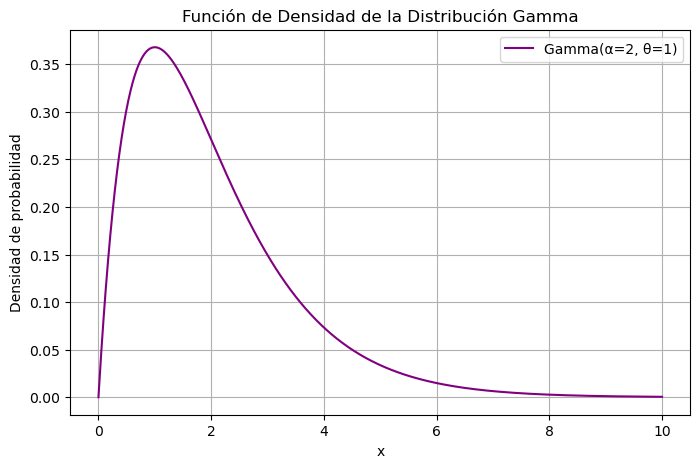

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Parámetros de la distribución Gamma
shape_param = 2  # Parámetro de forma (k o α)
scale_param = 1  # Parámetro de escala (θ)

# Generar valores de x
x = np.linspace(0, 10, 1000)

# Calcular la PDF de la distribución Gamma
gamma_pdf = gamma.pdf(x, a=shape_param, scale=scale_param)

# Graficar la PDF de la distribución Gamma
plt.figure(figsize=(8, 5))
plt.plot(x, gamma_pdf, label=f'Gamma(α={shape_param}, θ={scale_param})', color='purple')
plt.xlabel('x')
plt.ylabel('Densidad de probabilidad')
plt.title('Función de Densidad de la Distribución Gamma')
plt.grid(True)
plt.legend()
plt.show()

- Si $\alpha = 1$, $\lambda > 0 \Rightarrow$ v.a. exponencial.

- Si $\lambda = \frac{1}{2}$, $\alpha = \frac{k}{2}$, $k \in \mathbb{Z}^{+} \Rightarrow$ ji-cuadrada.

- Si $\lambda > 1$ y $\alpha > 1 \Rightarrow$ Erlang $\Rightarrow$ aplicaciones.


**Ejemplo** Sea $X \sim \mathcal{N}(0,1)$. Demostrar que $ X^2 $ tiene una distribución gamma.

**Solución:** Para $z \geq 0$, se tiene que:

$$
\begin{align*}
F_{X^2}(z) &= P(X^2 \leq z) = P(-\sqrt{z} \leq X \leq \sqrt{z}) \\
&= F_X(\sqrt{z}) - F_X(-\sqrt{z}) \\
\end{align*}
$$
Derivando, obtenemos la función de densidad:

$$ f_{X^2}(z) = \frac{d}{dz} F_{X^2}(z) = \frac{1}{2\sqrt{z}} f_X(\sqrt{z}) + \frac{1}{2\sqrt{z}} f_X(-\sqrt{z}) $$

Como la densidad de $X$ es simétrica, se tiene que 

$$ f_{X^2}(z) = \frac{1}{\sqrt{2\pi}} e^{-z/2} \frac{1}{2\sqrt{z}} = \frac{(1/2)^{1/2} z^{-1/2} e^{-z/2}}{\Gamma(1/2)}  \sim Gamma\left(\frac{1}{2}, \frac{1}{2}\right) $$

## Variable aleatoria Beta con parámetros $\alpha$ y $\beta$.


La distribución beta es una familia de distribuciones de probabilidad continua definida en el intervalo [0, 1]. Es particularmente útil para modelar variables que representan proporciones y porcentajes.

La función beta, $B(\alpha, \beta)$, se define como:

$$
B(\alpha, \beta) = \int_0^1 t^{\alpha-1}(1-t)^{\beta-1} dt = \frac{\Gamma(\alpha) \Gamma(\beta)}{\Gamma(\alpha + \beta)}
$$

La función de densidad de probabilidad de la distribución beta se expresa como:

$$
f_X(x) = \frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha, \beta)},
$$
con $x\in (0,1)$.

**Notación.** $X\sim \text{Beta}(\alpha, \beta)$.



### Esperanza y Varianza
Si $X\sim \text{Beta}(\alpha, \beta)$, entonces
  $$\mathbb{E}[X] = \frac{\alpha}{\alpha + \beta}$$
y
  $$\text{Var}(X) = \frac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)}.$$





**Ejemplo.** Supongamos que un análisis sugiere que una nueva inversión tiene una alta probabilidad de éxito. Usando una distribución beta con $\alpha = 5$ y $\beta = 1$, entonces:

$$
f_{X}(x) = 5x^4, \quad \mathbb{E}[X] = \frac{5}{6}, \quad \text{Var}(X) = \frac{5}{252}
$$


**Aplicaciones en la Vida Real**

La distribución beta se utiliza en una variedad de campos, incluyendo:
- Finanzas: para modelar la variabilidad en tasas de retorno de inversiones.
- Mercadotecnia: para analizar proporciones de respuesta de consumidores.
- Ciencias de la salud: en la evaluación de la efectividad de tratamientos médicos.
- Ecología: para estimar proporciones en estudios de biodiversidad.